# Cross Validation and Training, Validation, Testing Data Sets

* Since we can (often, easily) overfit, our error or prediction performance on a training data set is not a good indication of performance on unknown test data.  
* One way to estimate test performance of a system on unknown test data is to use some of the training data for training and some for validation (to act like unknown test data). 
* If you are repeatedly changing your model/adjusting parameters/tweaking your algorithm, you may even over fit the hold-out validation set.  So, you can hold out yet another set for testing. 
* However, in general, we only have a limited amount of training data. So, we want to use as much of it as possible for training.  One strategy to balance the tradeoff between needing training data and validation data is to use cross-validation.
* Cross-validation can also give an indication of stability/robustness of your method. 
* However there are downsides to cross-validation: need to train many times (which can sometimes be very computationally complex.), and you end up with several models - how do you pick the final one to use?
 
* For further reading and reference: Simon Haykin. Neural Networks A Comprehensive Foundation

# Regularization

* Two common approaches to avoid overfitting:
    1. More data: As you have more and more data, it becomes more and more difficult to ``memorize'' the data and its noise. Often, more data translates to the ability to use a more complex model and avoid overfitting.  However, generally, you need exponentially more data with increases to model complexity.  So, there is a limit to how much this helps.  If you have a very complex model, you need a huge training data set. 
    2. Regularization: Regularization methods add a penalty term to the error function to discourage overfitting.  These penalty terms encourage small values limiting the ability to overfit.   These penalty terms are a way to trade-off between error and complexity.  


\begin{eqnarray}
E^{\ast}(\mathbf{w}) &=& \frac{1}{2}\sum_{n=1}^N \left( y(x_n, \mathbf{w}) - t_n \right)^2 + \frac{\lambda}{2}\left\| \mathbf{w} \right\|^2_2\\
&=& \frac{1}{2}\left(\mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)\left(\mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)^T + \frac{\lambda}{2}\mathbf{w}^T\mathbf{w}\\
&=& \frac{1}{2}\left\| \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right\|_2^2 + \frac{\lambda}{2}\left\| \mathbf{w}\right\|_2^2
\end{eqnarray}

* *What does each term mean/promote in the minimization? Why does the second term make sense for minimizing complexity?*

\begin{eqnarray}
E^{\ast}(\mathbf{w}) &=& \frac{1}{2}\sum_{n=1}^N \left( y(x_n, \mathbf{w}) - t_n \right)^2 + \frac{\lambda}{2}\left\| \mathbf{w} \right\|^2_2\\
&=& \frac{1}{2}\left(\mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)\left(\mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)^T + \frac{\lambda}{2}\mathbf{w}^T\mathbf{w}
\end{eqnarray}
\begin{eqnarray}
& &\frac{\partial E^{\ast}(\mathbf{w})}{\partial \mathbf{w}} = 0 = \mathbf{X}^T\left(\mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)^T + \frac{\lambda}{2}2 \mathbf{w}\\
& & 0 = \mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{X}^T\mathbf{t} + \lambda\mathbf{w}\\
& & \mathbf{X}^T\mathbf{t} = \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)\mathbf{w}\\
& & \mathbf{w} = \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\mathbf{t}
\end{eqnarray}

* The $l_2$ norm penalty is common (because it works so well mathematically with the least-squares error objective) and, so, has many names: shrinkage, ridge regression, weight decay

* *So, what happens when $\lambda$ is increased? decreased?  Can you think of a way to set $\lambda$?*

In [1]:
import sys
sys.path.append('..')
from HelperCode.generateUniformData import generateUniformData
from HelperCode.plotData import plotData

In [2]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import textwrap
%matplotlib inline 

def fitdataReg(x,t,M,la):
	'''fitdata(x,t,M): Fit a polynomial of order M to the data (x,t)'''	
	X = np.array([x**m for m in range(M+1)]).T
	w = np.linalg.inv(X.T@X+(la*np.identity(M+1)))@X.T@t
	return w
        
l = 0
u = 1
N = 10
gVar = .1

data_uniform  = np.array(generateUniformData(N, l, u, gVar)).T
x1 = data_uniform[:,0]
t1 = data_uniform[:,1]

[-1.33718911e+00  6.23212102e+01 -8.92100554e+02  7.21087741e+03
 -3.37566823e+04  9.46270613e+04 -1.61597389e+05  1.64572998e+05
 -9.17273565e+04  2.15061629e+04]


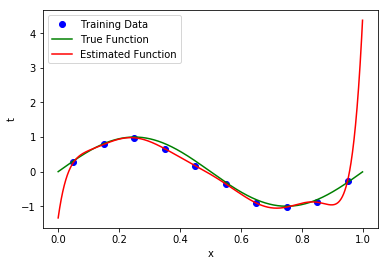

In [3]:
M = 9
la = 0
fig = plt.figure()

w = fitdataReg(x1,t1,M,la)

x2 = np.arange(l,u,0.001)  #get equally spaced points in the xrange
t2 = np.sin(2*math.pi*x2) #compute the true function value
    
X3 = np.array([x2**m for m in range(M+1)]).T
x3 = x2
t3 = X3@w

plotData(x1, t1, x2, t2, x3, t3, legend=['Training Data', 'True Function', 'Estimated Function'])
print(w)


# 2. Bayesian Interpretation of Regularization


* We looked at the regularization term as a *penalty* term in the objective function.  There is another way to interpret the regularization term as well.  Specifically, there is a *Bayesian* interpretation. 

\begin{eqnarray}
\min E^{\ast}(\mathbf{w}) &=& \max -E^{\ast}(\mathbf{w})\\
& =& \max \exp \left\{ -E^{\ast}(\mathbf{w})\right\}\\
&=& \max \exp \left\{ -\frac{1}{2}\sum_{n=1}^N \left( y(x_n, \mathbf{w}) - t_n \right)^2 - \frac{\lambda}{2}\left\| \mathbf{w} \right\|^2_2 \right\}\\
&=& \max \exp \left\{ -\frac{1}{2}\sum_{n=1}^N \left( y(x_n, \mathbf{w}) - t_n \right)^2 \right\}\exp\left\{-\frac{1}{2}\lambda\left\| \mathbf{w} \right\|^2_2\right\}\\
&=& \max \prod_{n=1}^N \exp \left\{ -\frac{1}{2} \left( y(x_n, \mathbf{w}) - t_n \right)^2 \right\}\exp\left\{-\frac{1}{2}\lambda\left\| \mathbf{w} \right\|^2_2\right\}
\end{eqnarray}


* So, this is a maximization of the *data likelihood* with a *prior*: $p(\mathbf{X}|\mathbf{w})p(\mathbf{w})$


## Method of Maximum Likelihood

* A *data likelihood* is how likely the data is given the parameter set
* So, if we want to maximize how likely the data is to have come from the model we fit, we should find the parameters that maximize the likelihood
* A common trick of maximizing the likelihood is to maximize the log likelihood.  Often makes the math much easier.  *Why can we maximize the log likelihood instead of the likelihood and still get the same answer?*
* Consider: $\max \ln \exp \left\{ -\frac{1}{2}\left(y(x_n, \mathbf{w}) - t_n\right)^2\right\}$ We go back to our original objective. 

## Method of Maximum A Posteriori (MAP)

* Bayes Rule: $p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)}$
* Consider: $p(\mathbf{w}|\mathscr{D}) = \frac{p(\mathscr{D}|\mathbf{w})p(\mathbf{w})}{p(\mathscr{D})}$, i.e., posterior $\propto$ likelihood $\times$ prior

